In [1]:
##0.3

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.927840      0.031163      0.468213     0.185266
1  GaussianProcess       0.674173      0.056063      0.150039     0.208134
2              KNN       0.514445      0.370082      0.088257     0.262909
3     RandomForest       0.834111      0.108906      0.499536     0.145942
4          XGBoost       0.887670      0.114191      0.427152     0.181281


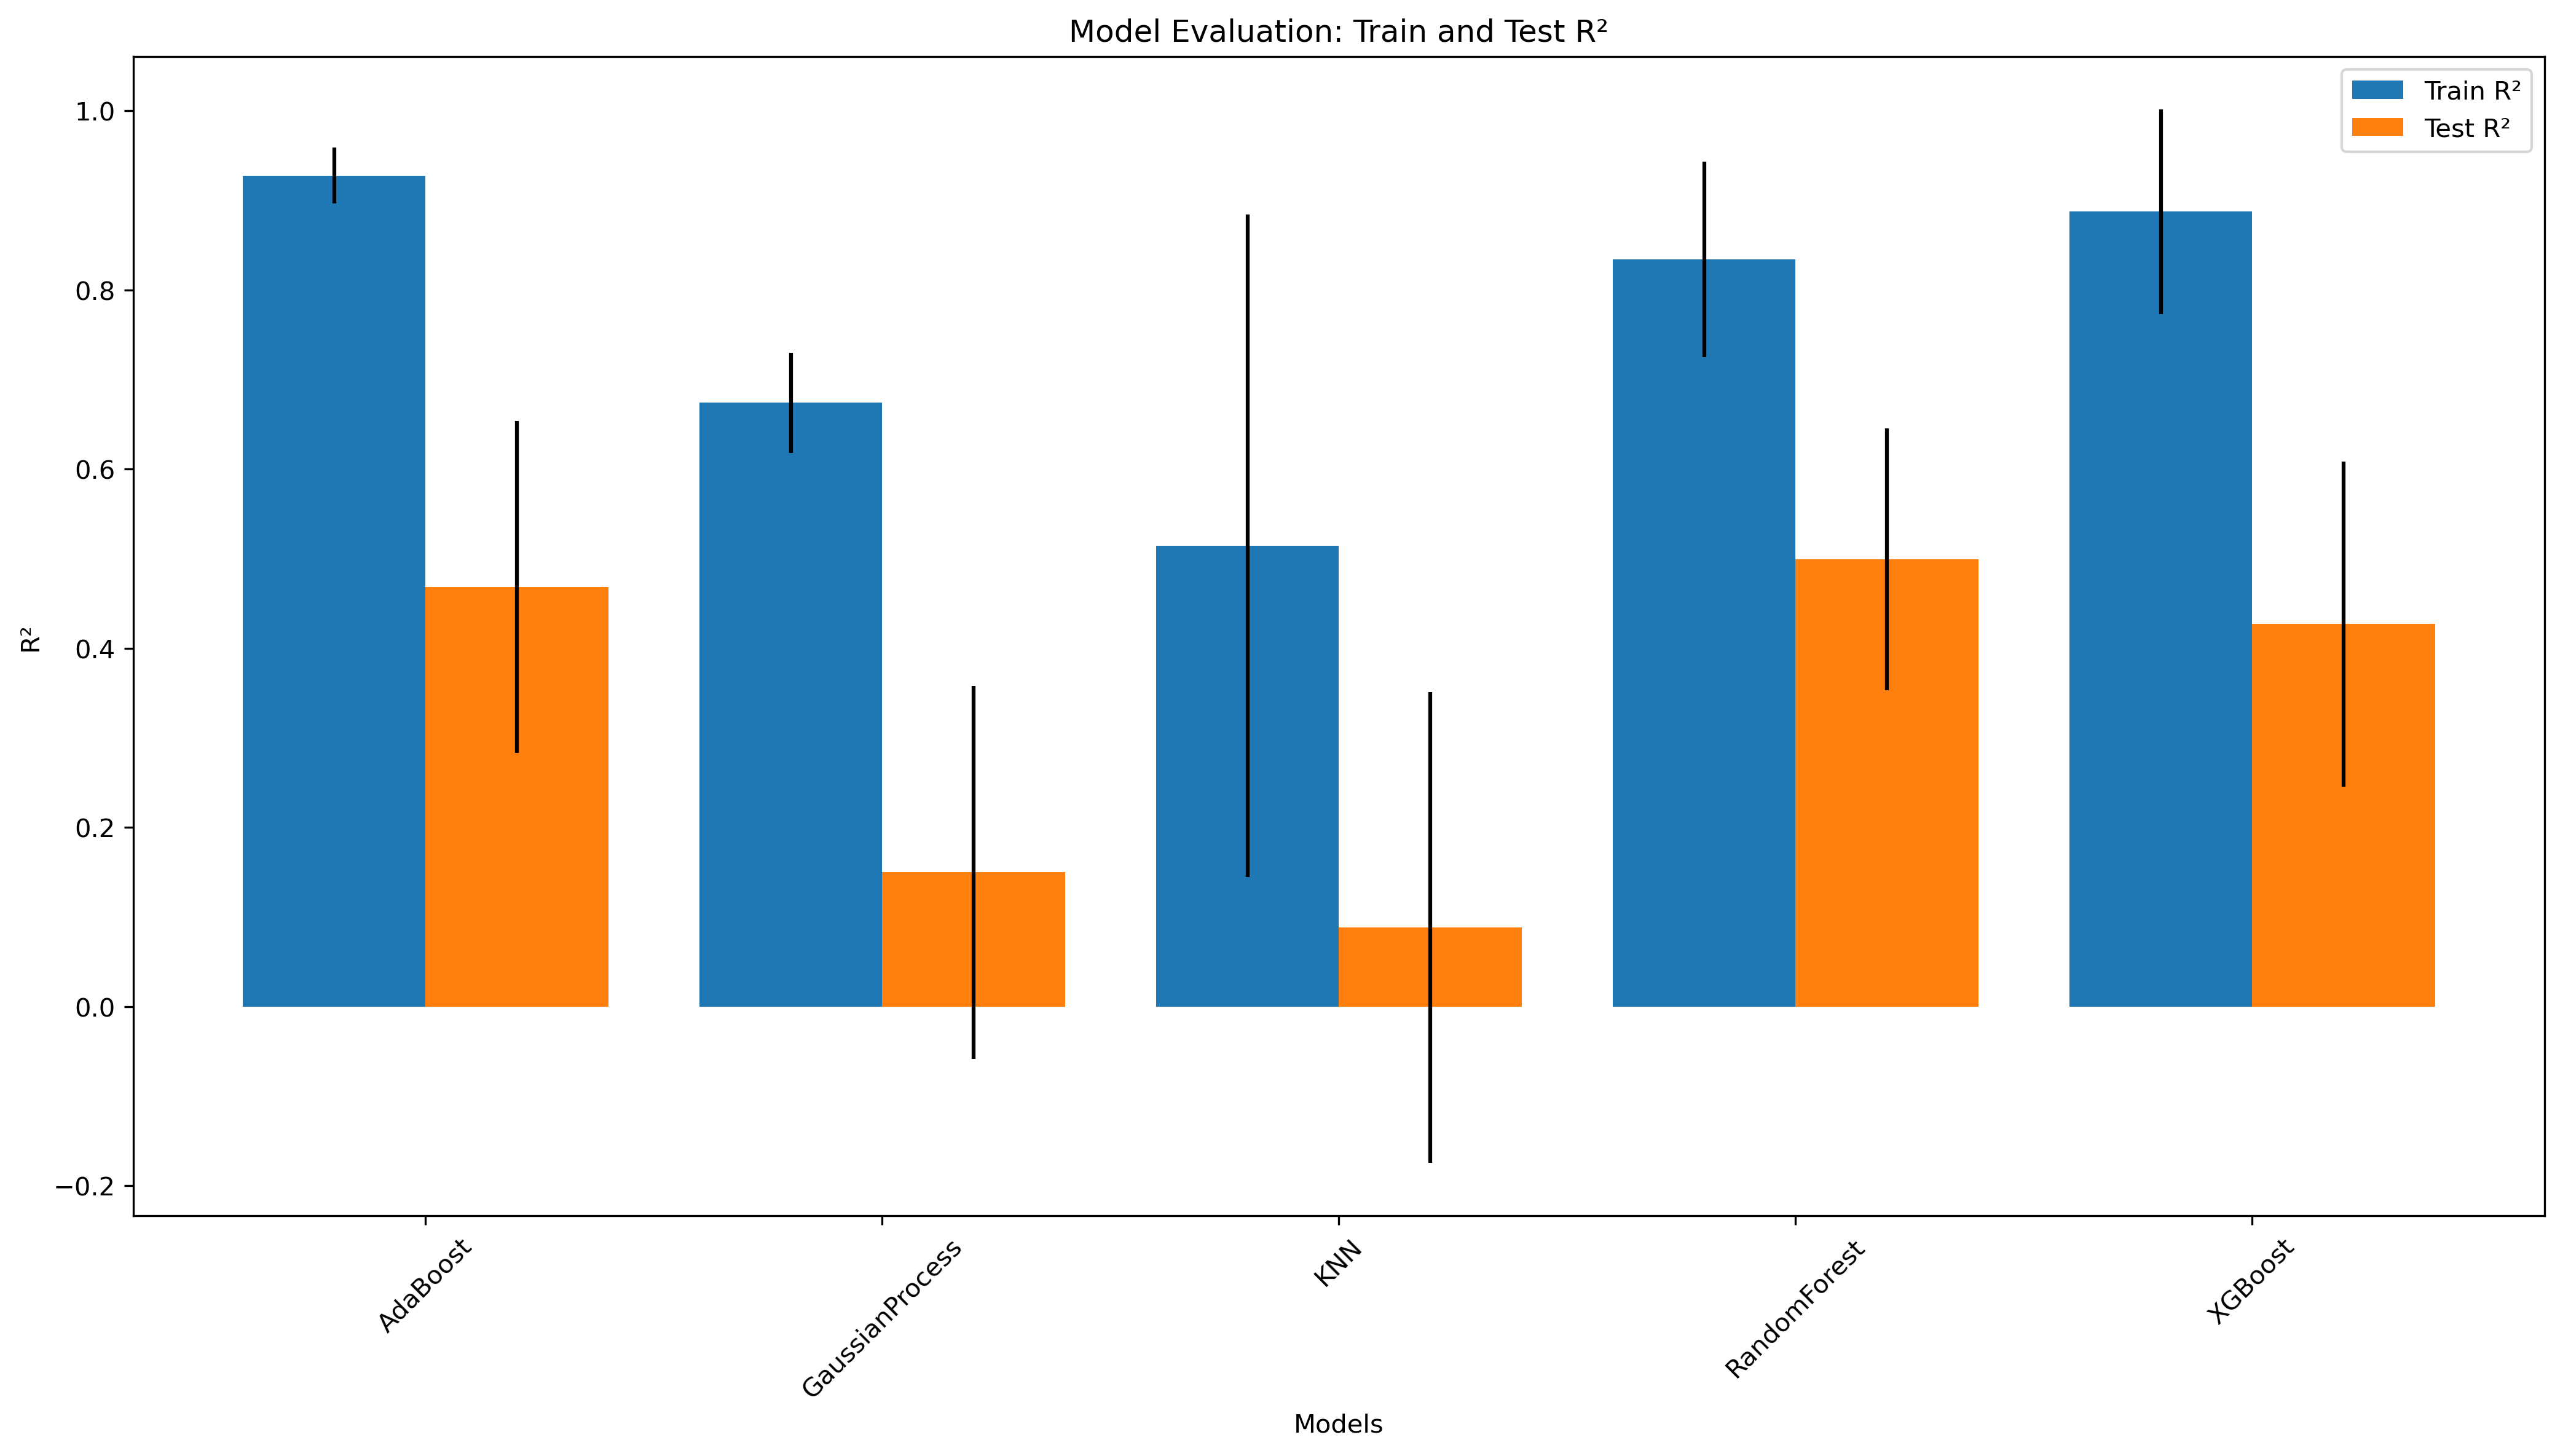

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('EL.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.3elmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
#0.4

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.905077      0.036493      0.536432     0.171268
1  GaussianProcess       0.697119      0.053551      0.252111     0.155525
2              KNN       0.465116      0.344101      0.145680     0.234902
3     RandomForest       0.858378      0.099559      0.575028     0.134399
4          XGBoost       0.888235      0.107142      0.511564     0.191418


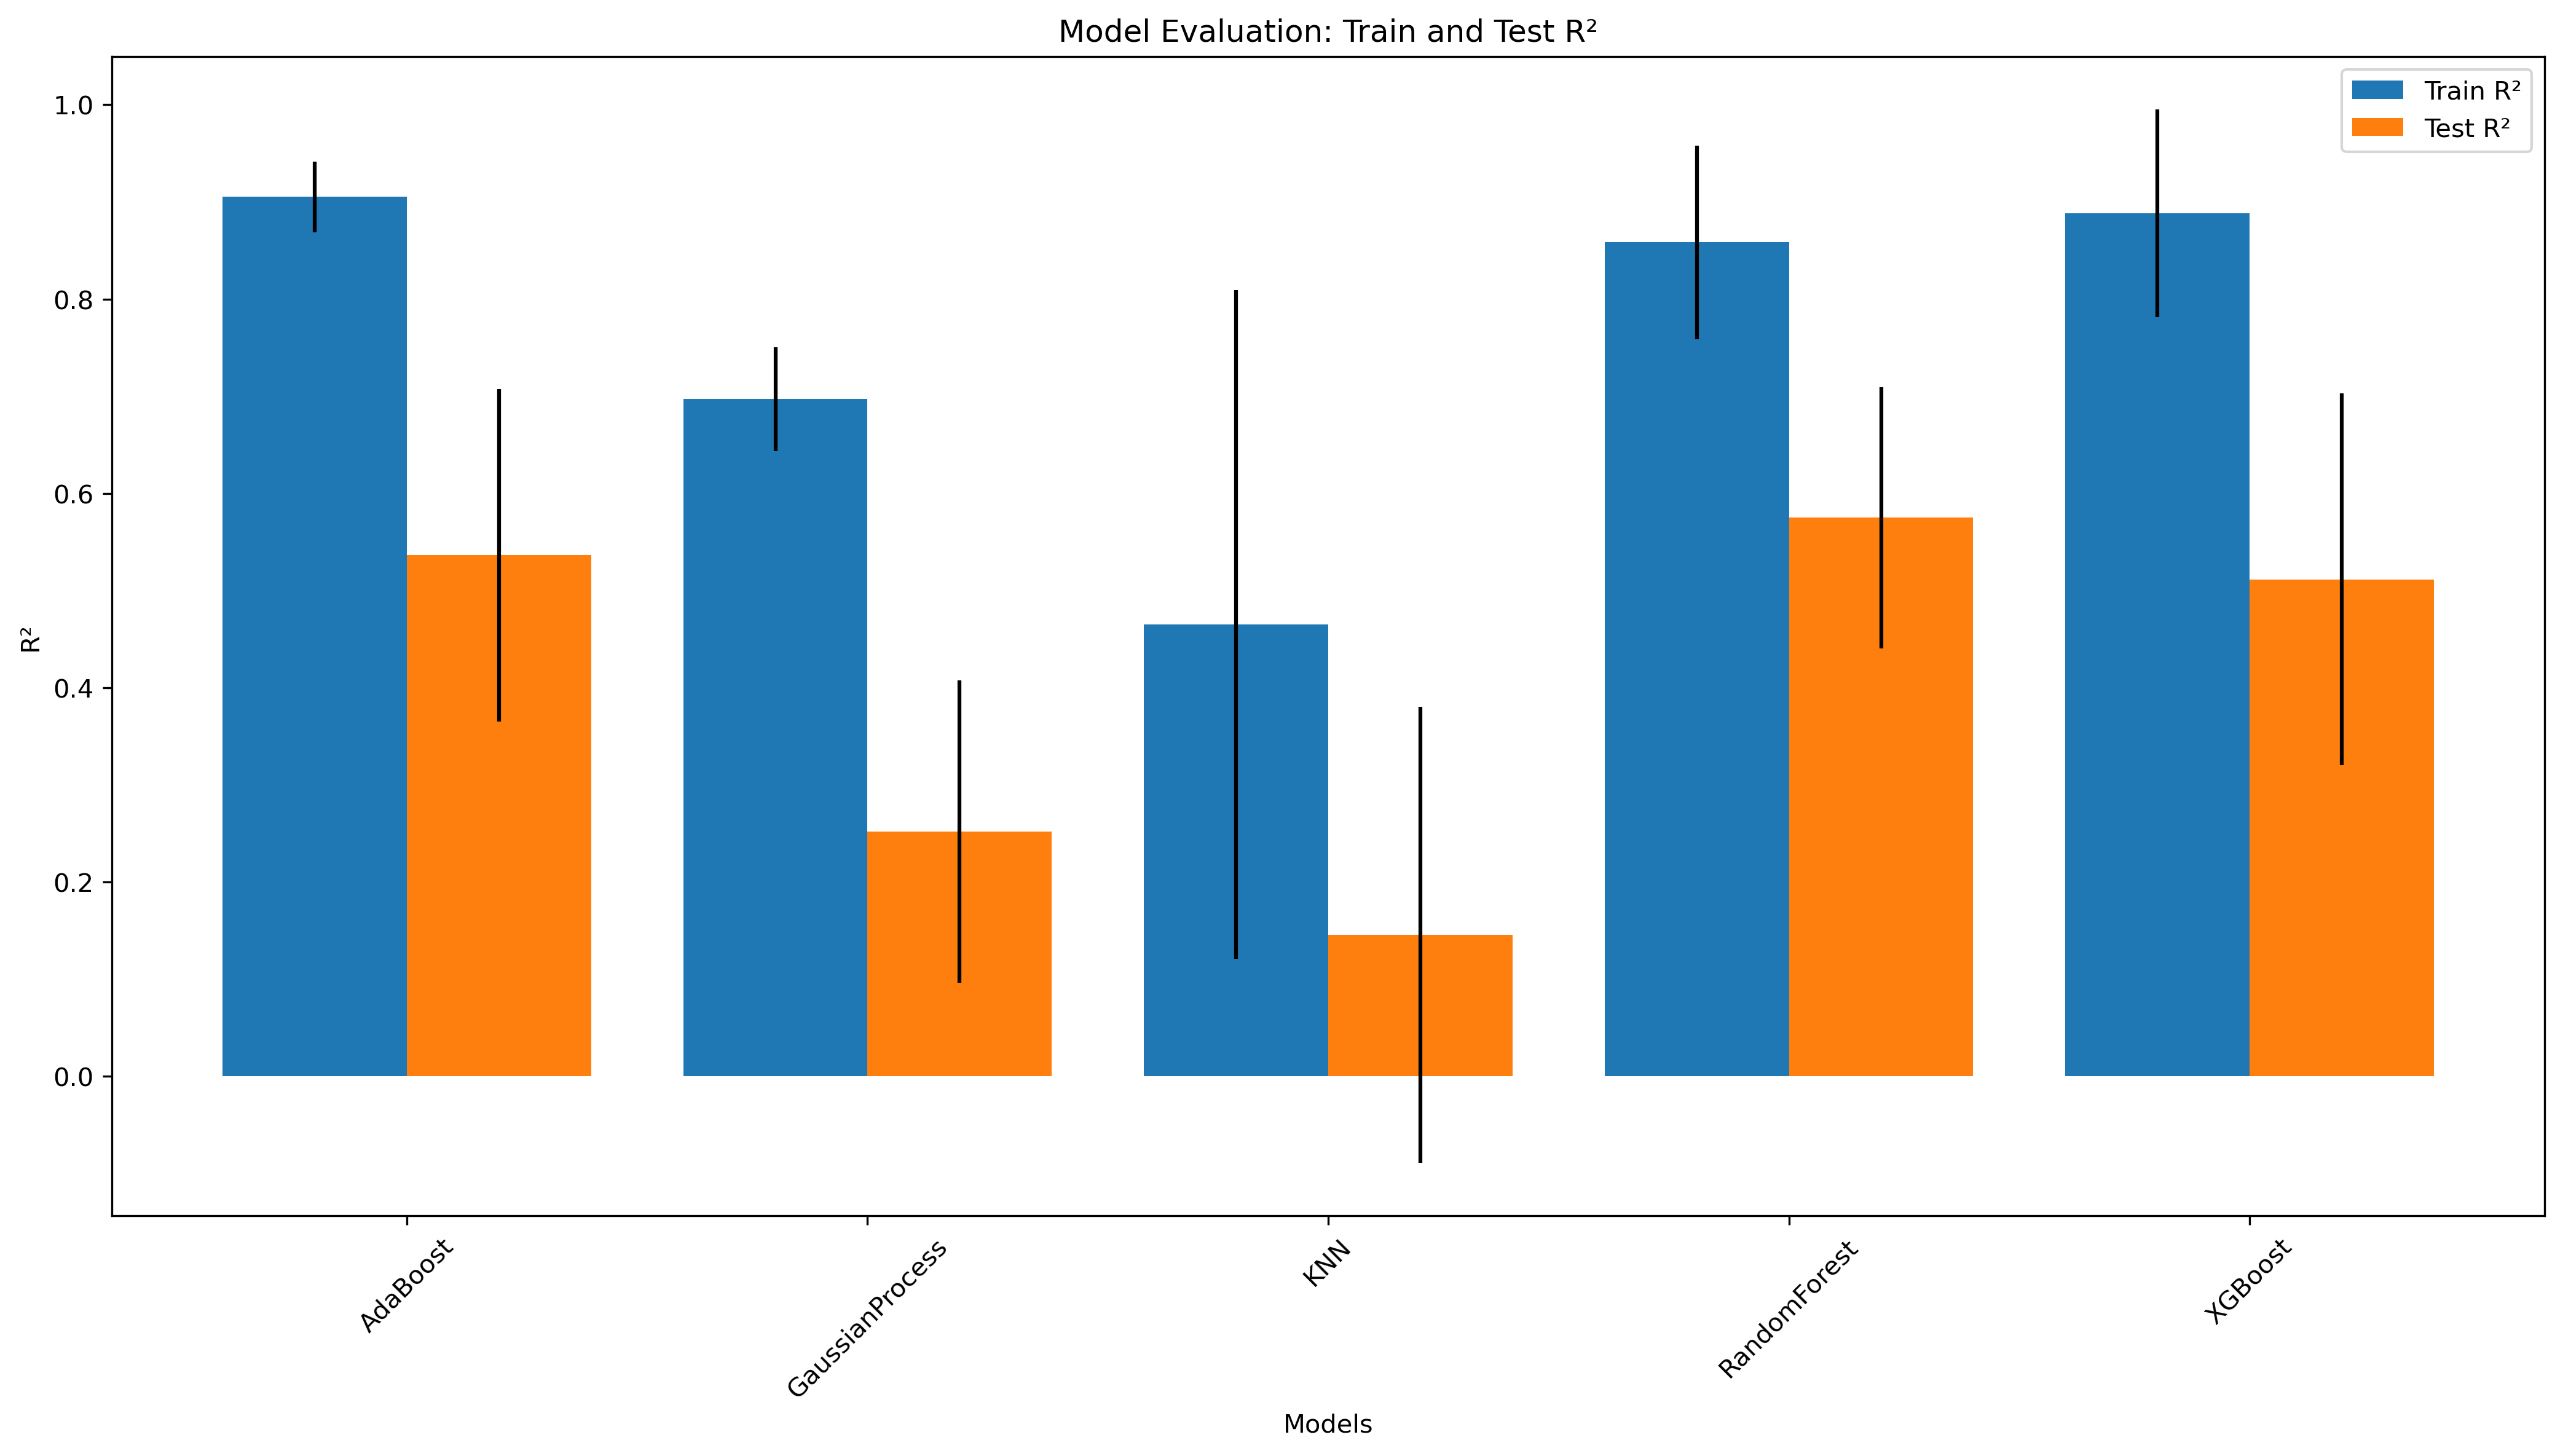

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('EL.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.4elmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
#0.5

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.876970      0.039989      0.569065     0.169881
1  GaussianProcess       0.714124      0.037462      0.330835     0.133759
2              KNN       0.570953      0.296750      0.238750     0.250514
3     RandomForest       0.896914      0.076506      0.640660     0.117285
4          XGBoost       0.917623      0.084729      0.578947     0.174557


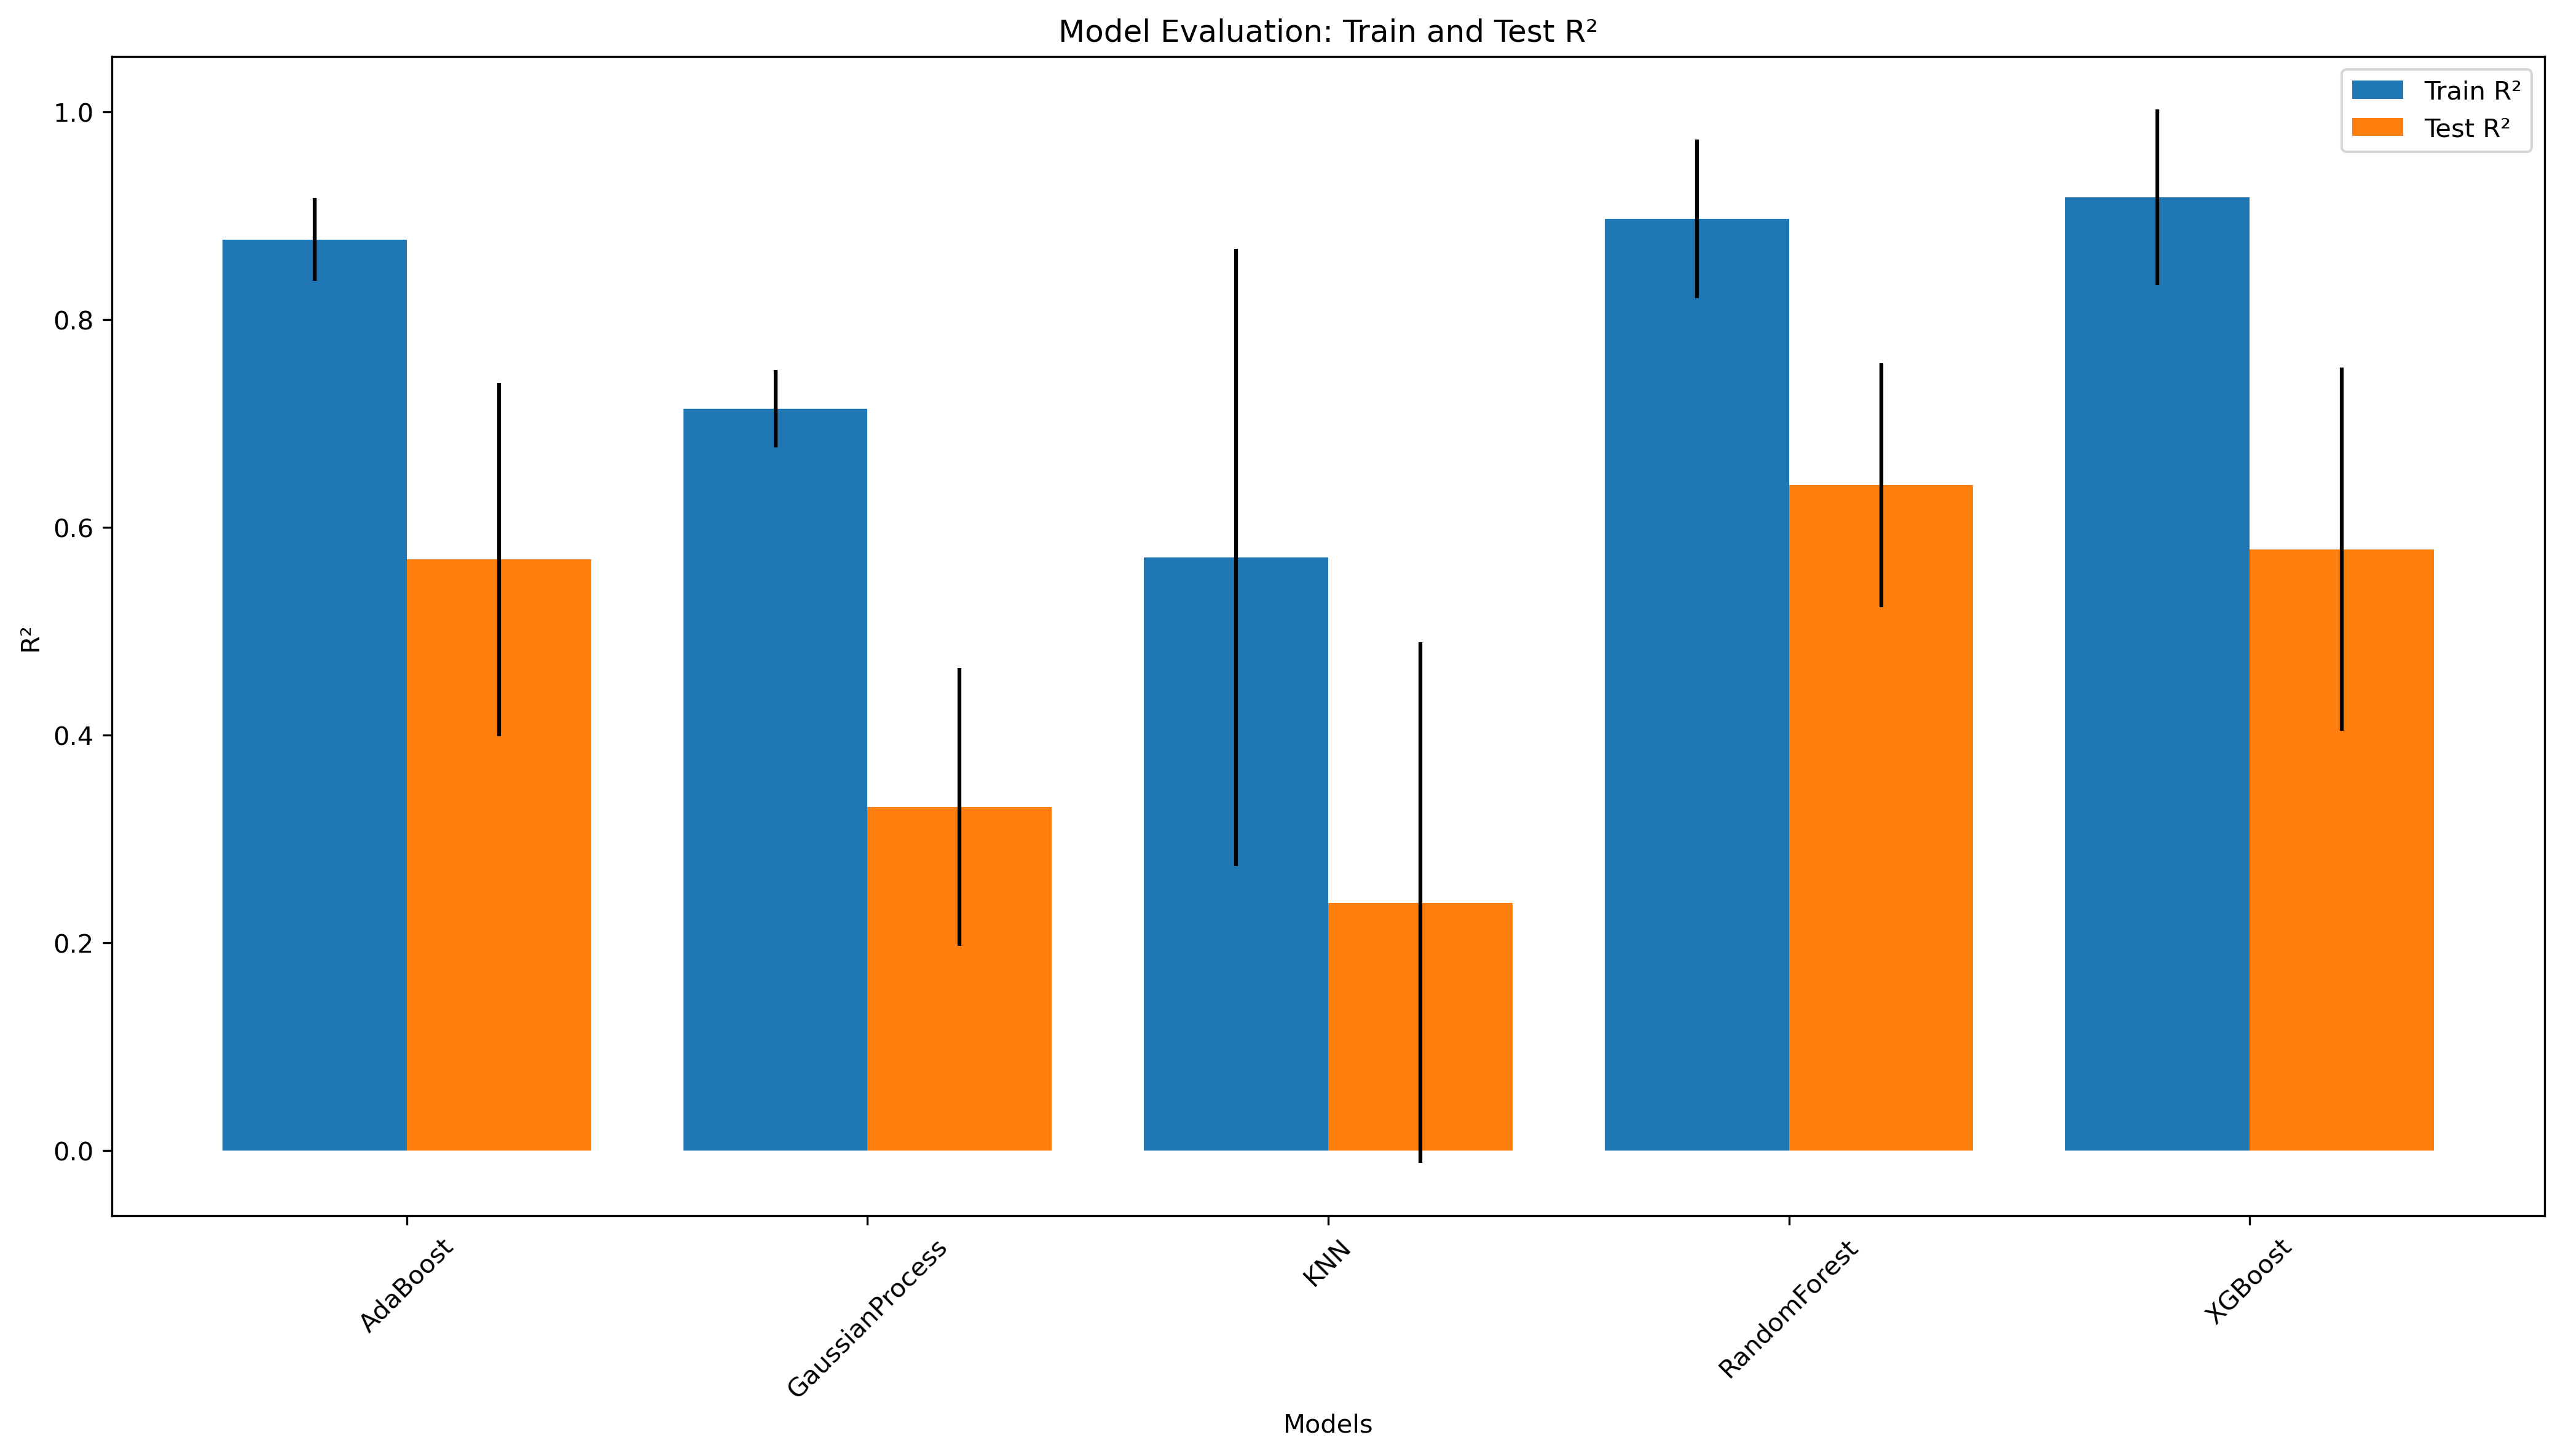

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('EL.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.5elmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
#0.6

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.861628      0.035566      0.617120     0.179192
1  GaussianProcess       0.721315      0.036790      0.382503     0.131885
2              KNN       0.562435      0.274160      0.242690     0.282725
3     RandomForest       0.925142      0.055862      0.695864     0.106724
4          XGBoost       0.922069      0.055109      0.629241     0.174988


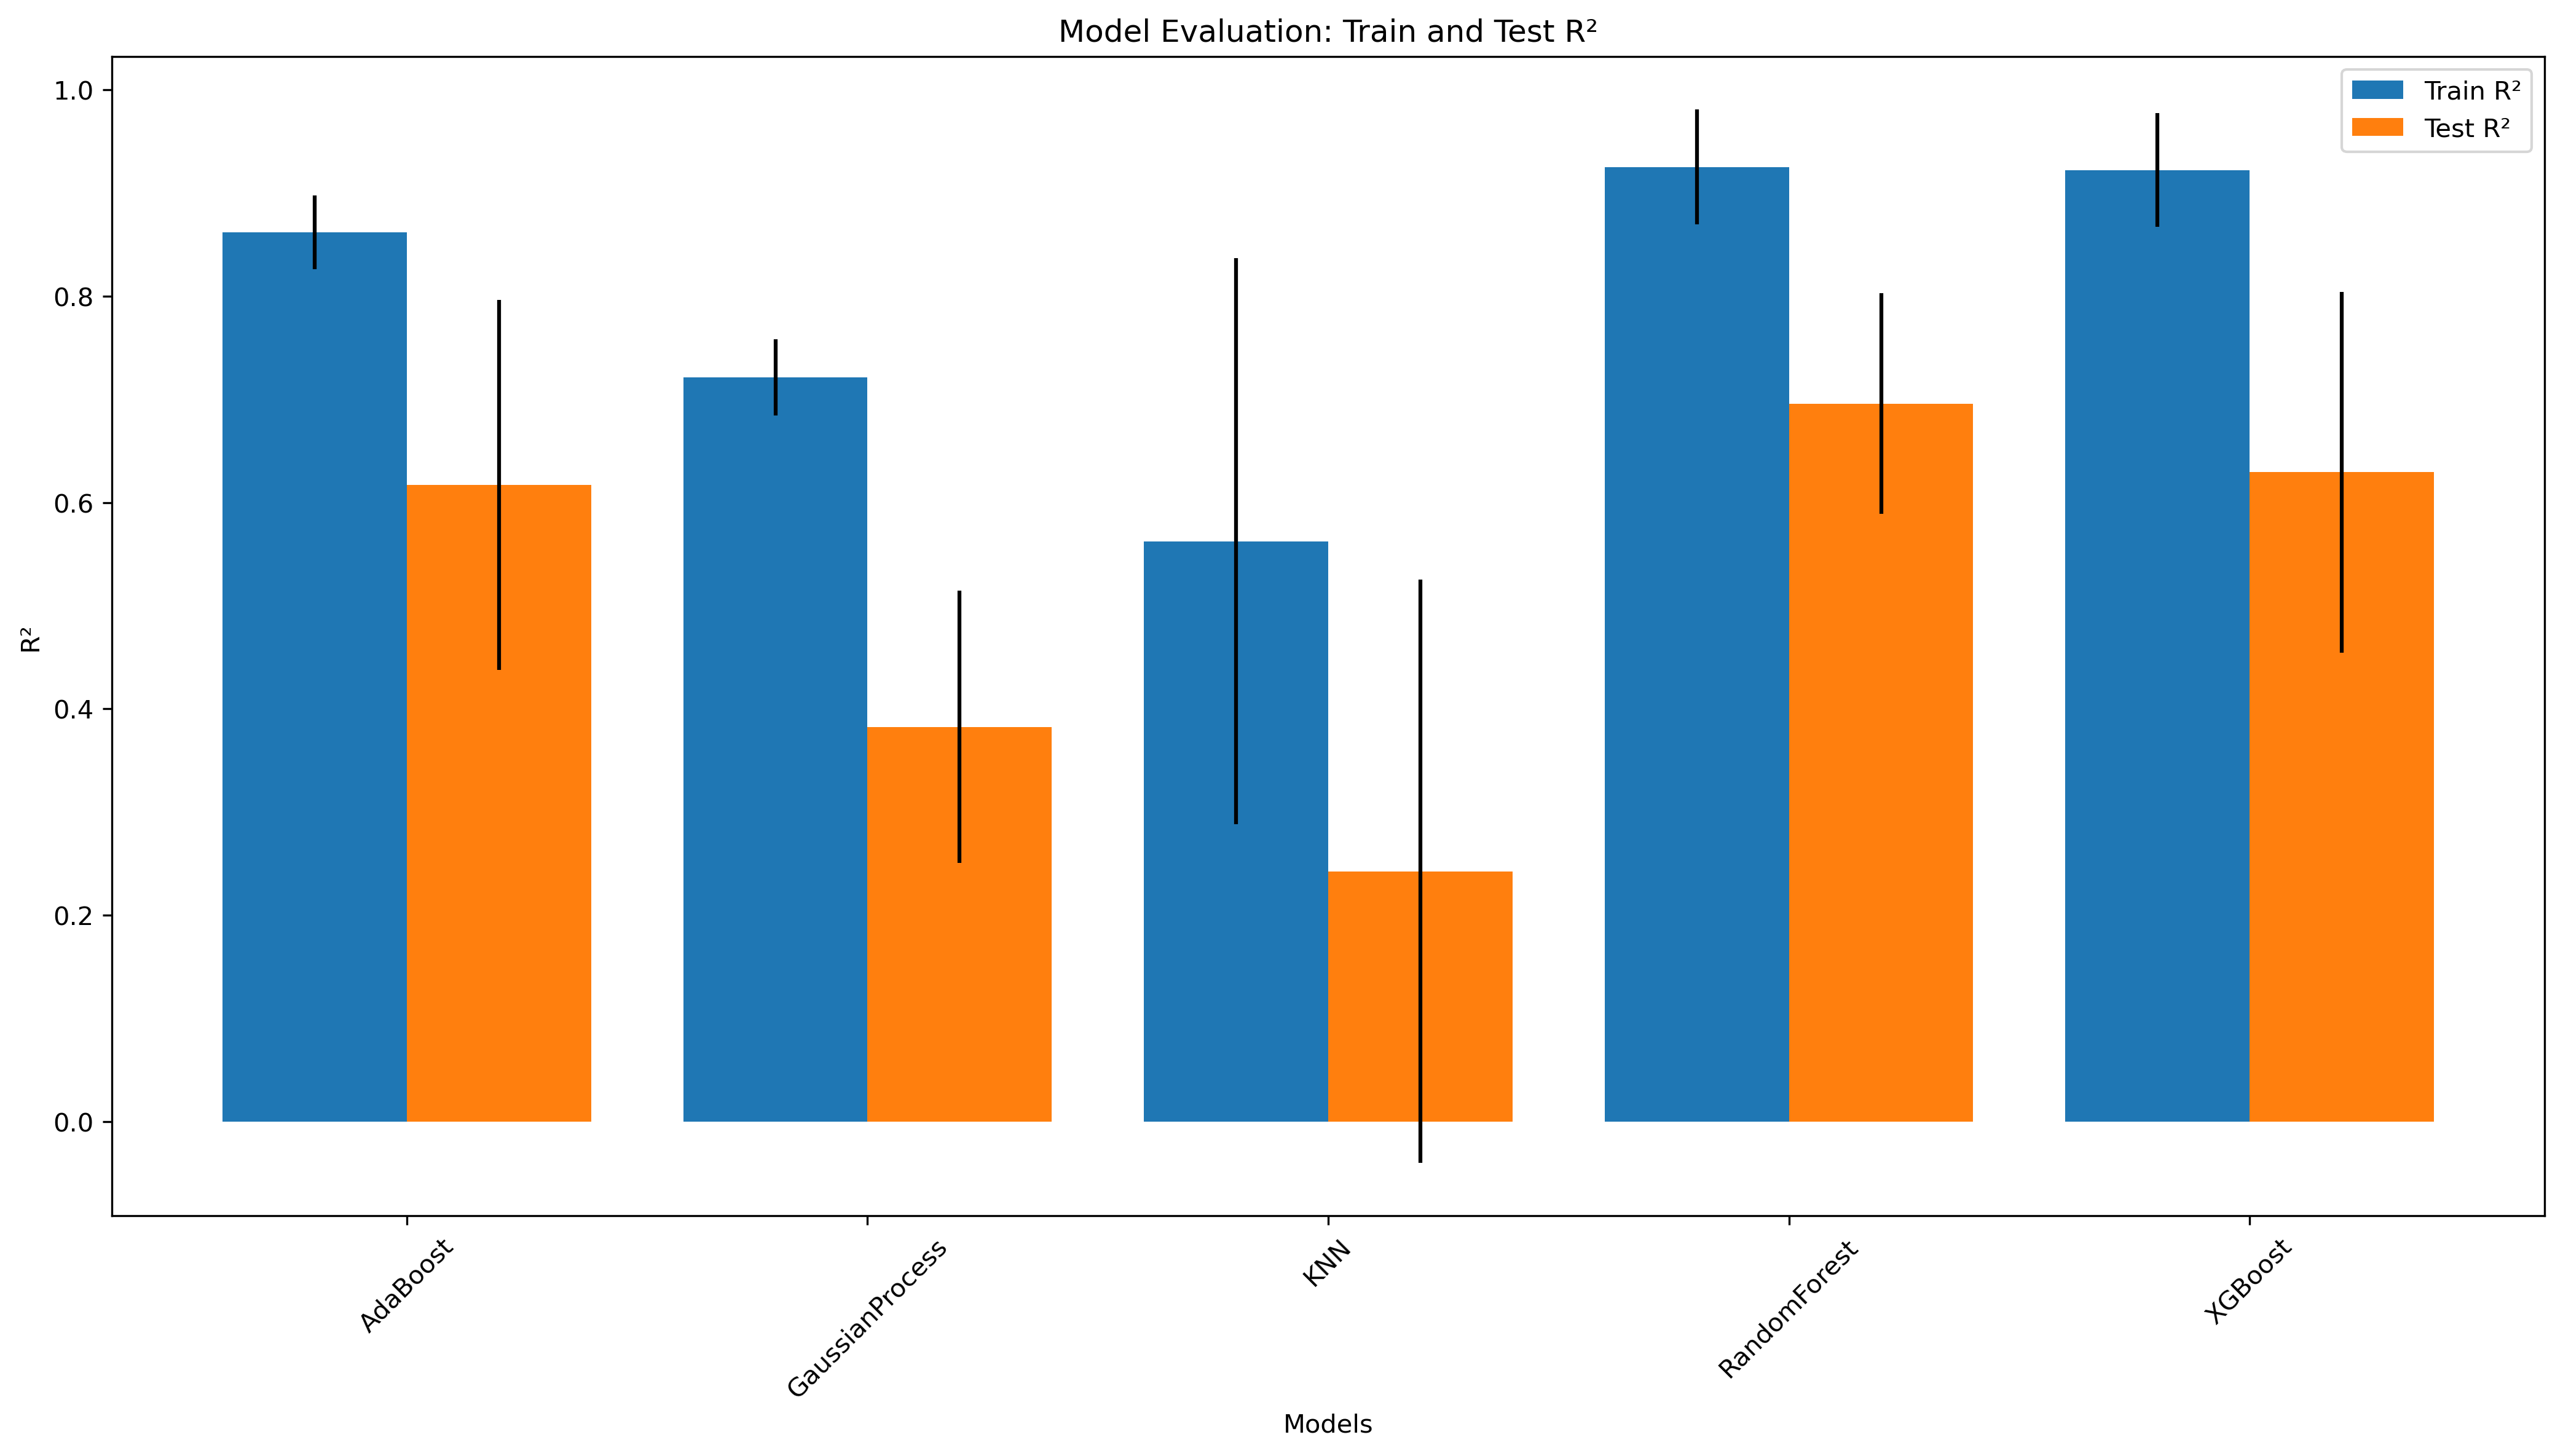

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('EL.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.6elmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
#0.7

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.844188      0.035098      0.652324     0.135374
1  GaussianProcess       0.732114      0.030734      0.413307     0.142716
2              KNN       0.601439      0.235547      0.284414     0.309416
3     RandomForest       0.949431      0.024505      0.732746     0.131028
4          XGBoost       0.922396      0.033534      0.678542     0.162535


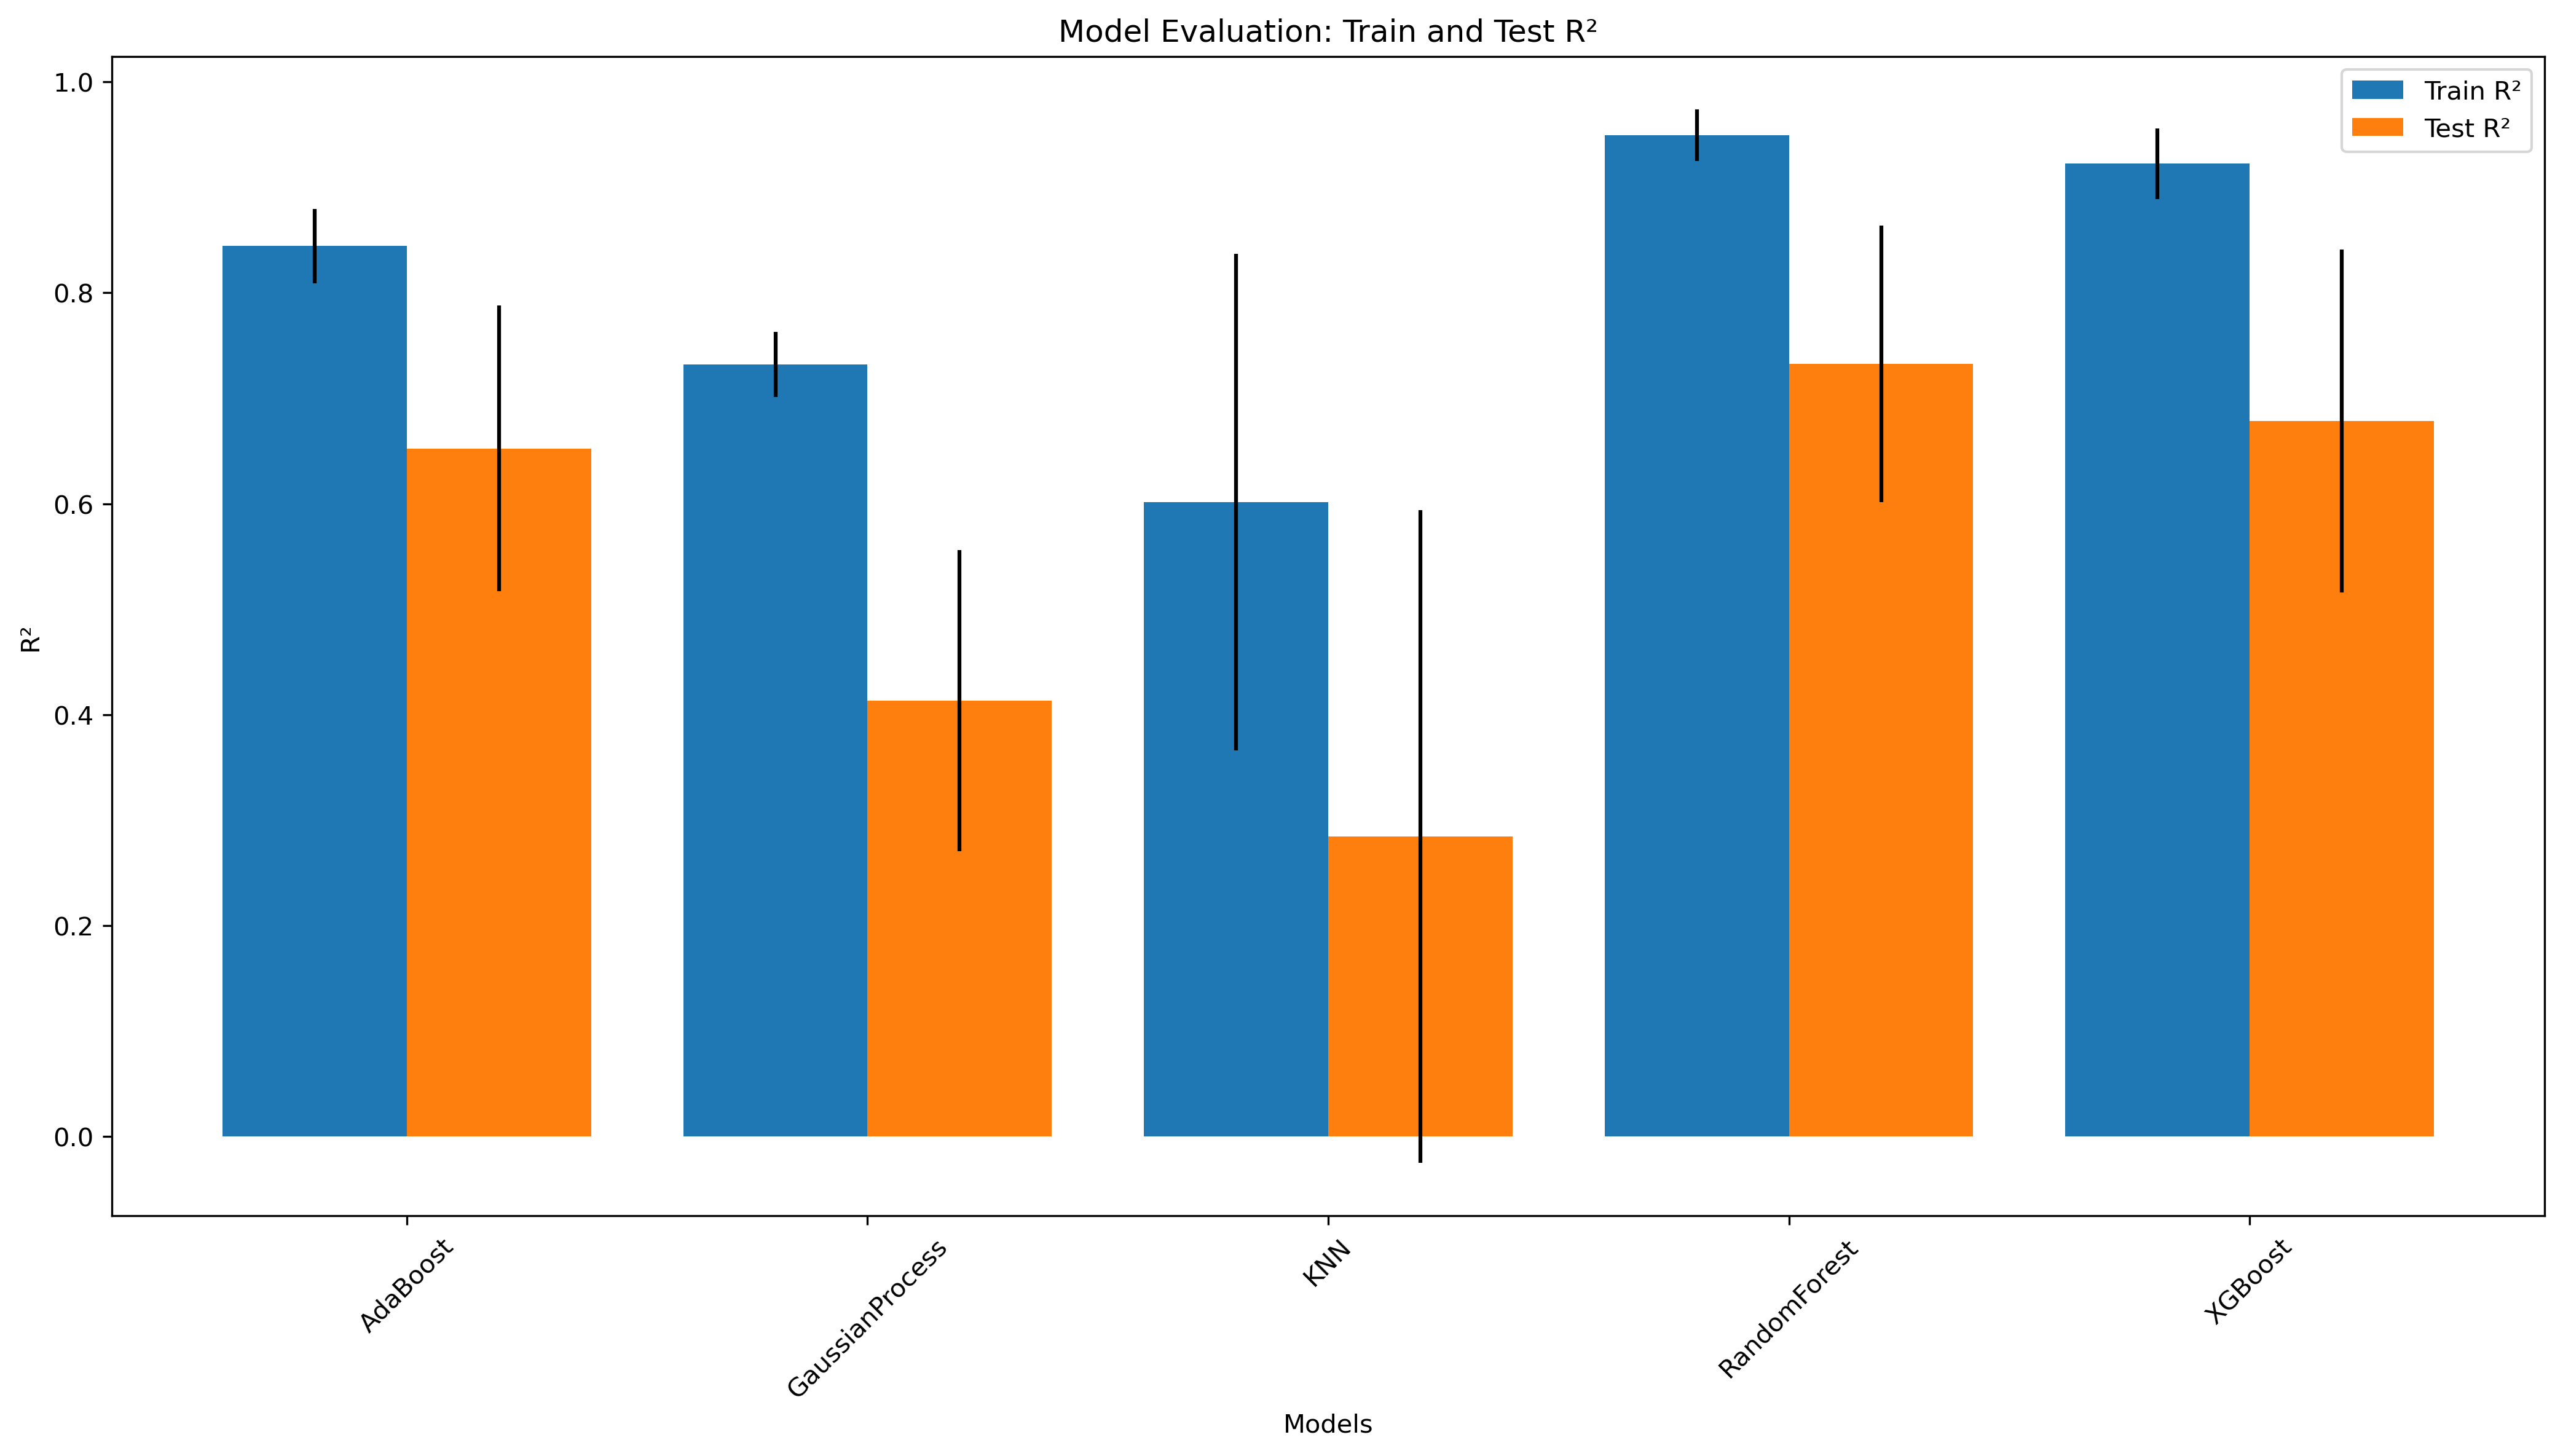

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('EL.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.7elmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
#0.8

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.840661      0.030764      0.659798     0.158723
1  GaussianProcess       0.741279      0.025175      0.416831     0.193056
2              KNN       0.647651      0.223462      0.274174     0.388362
3     RandomForest       0.950279      0.031880      0.764648     0.082122
4          XGBoost       0.918563      0.038600      0.696184     0.142661


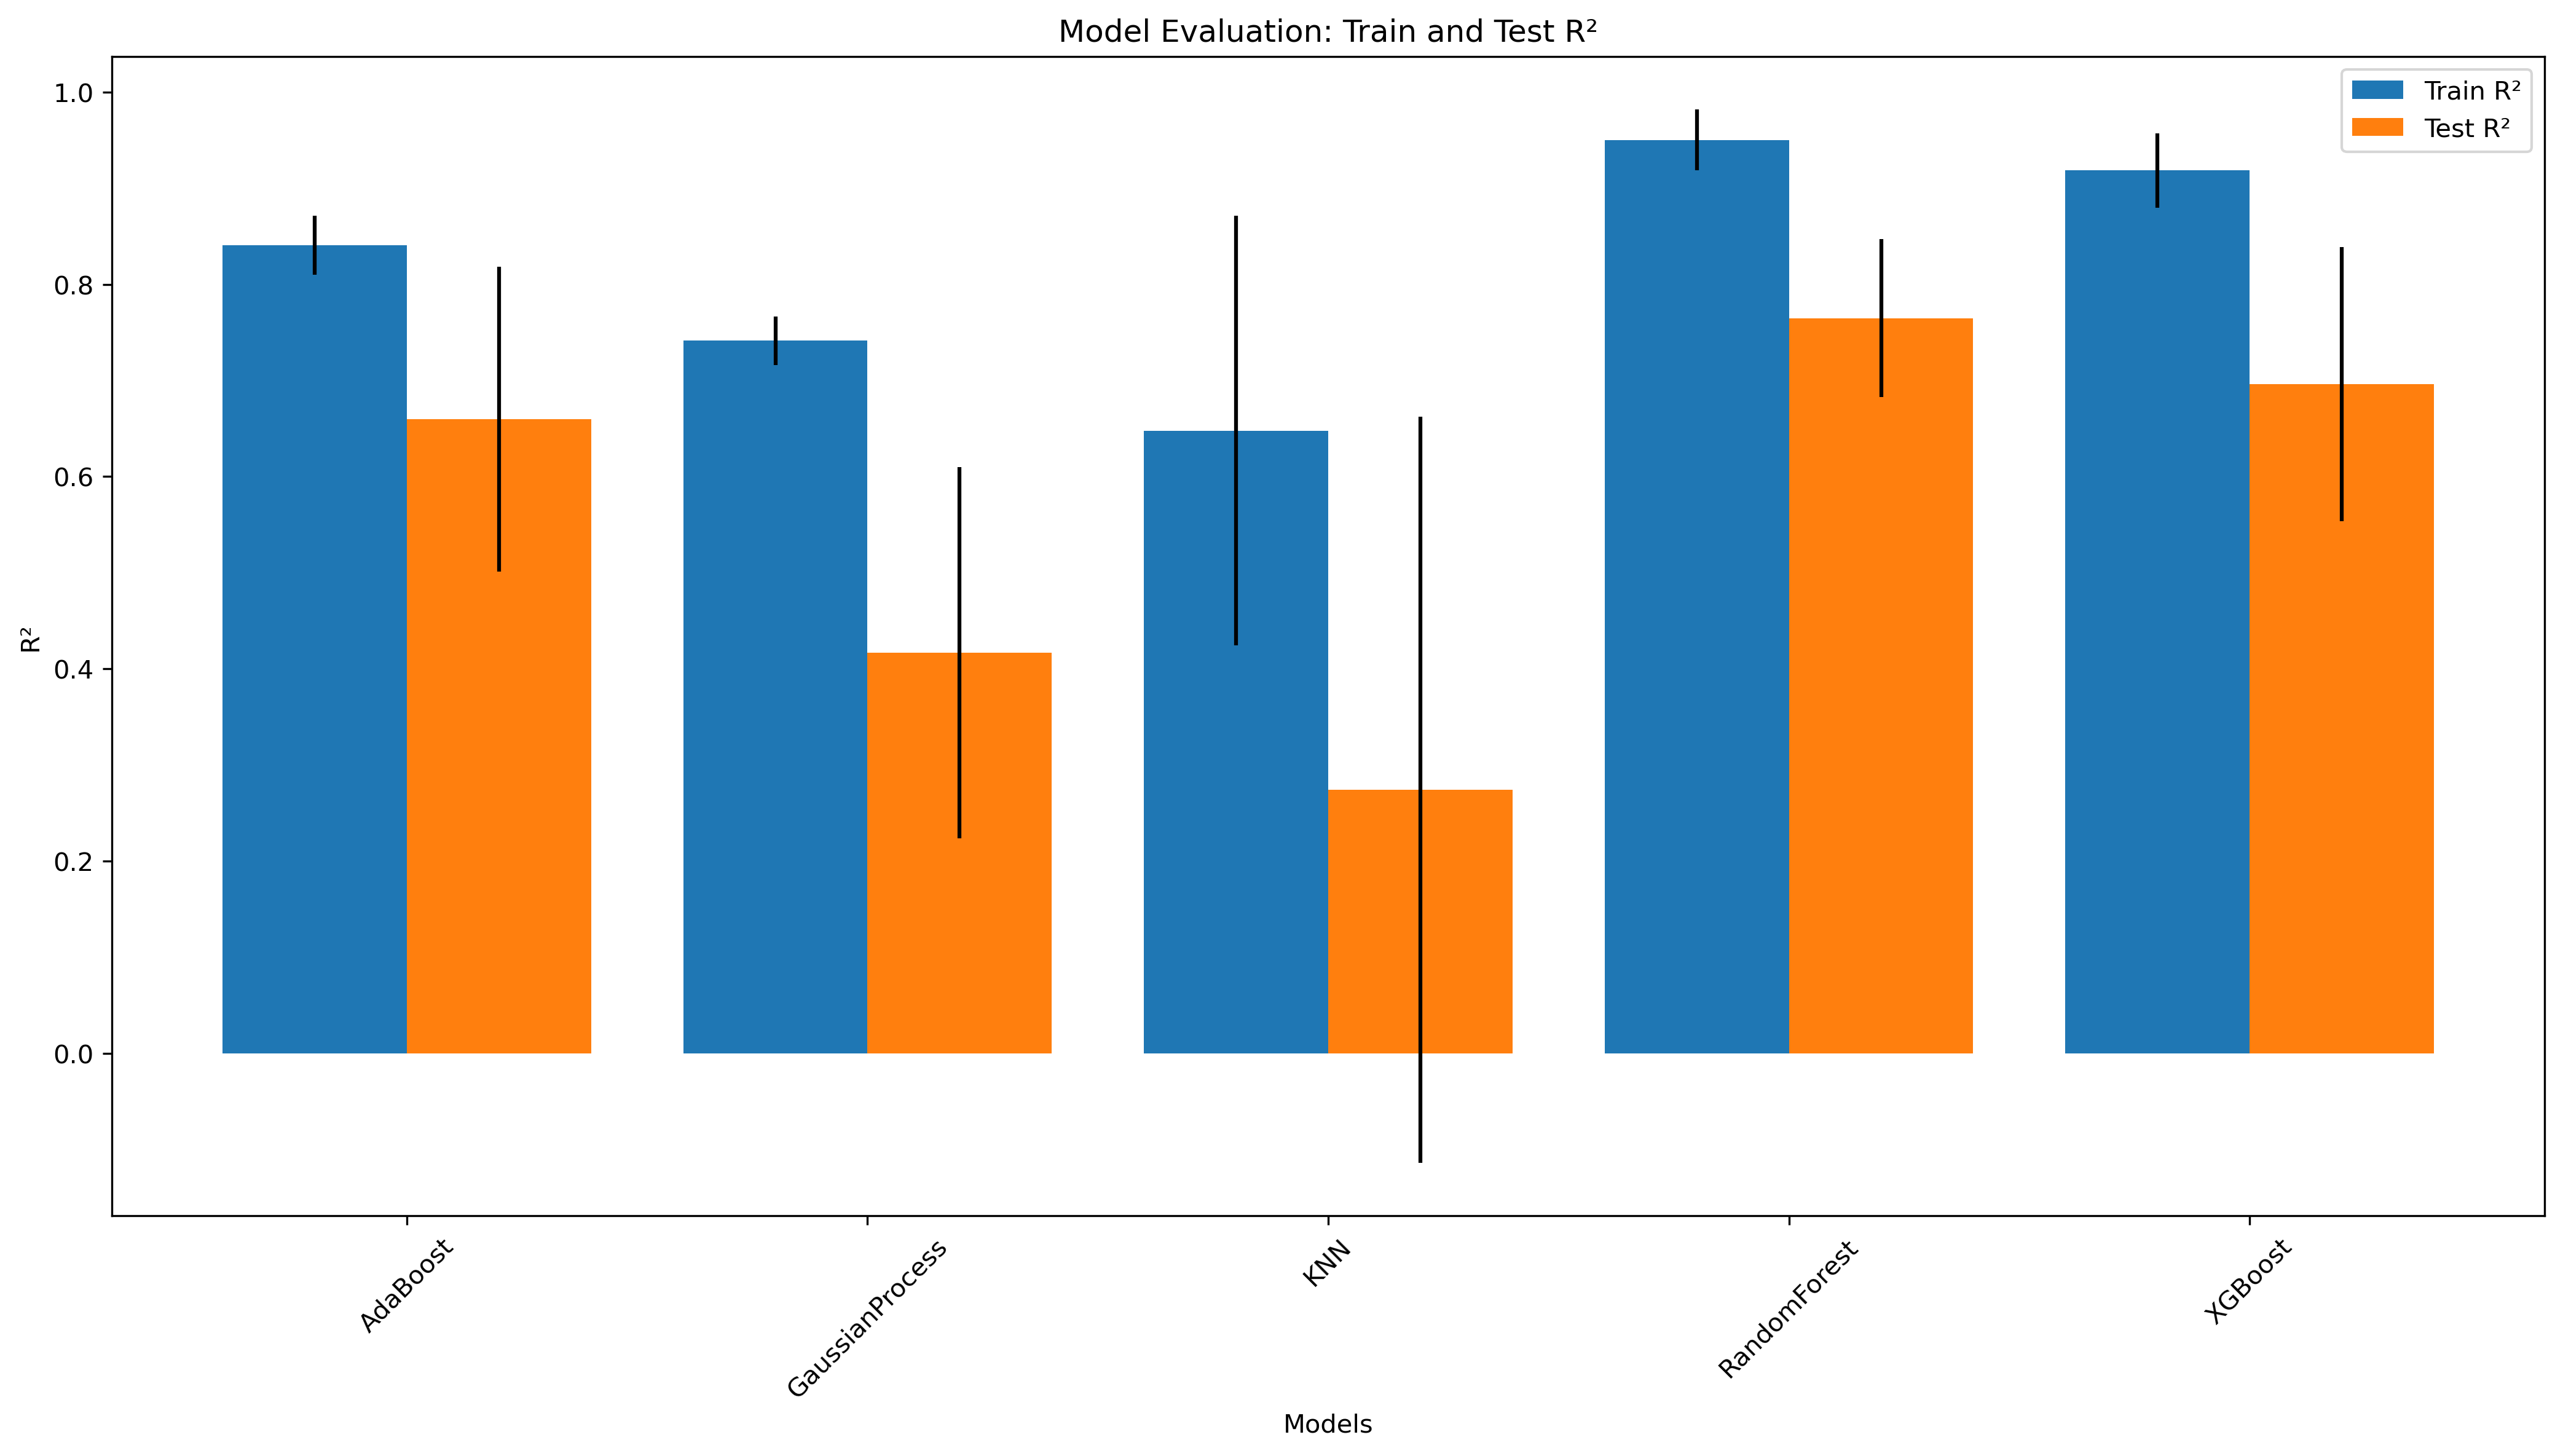

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('EL.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.8elmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
#0.9

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.824742      0.028977      0.634040     0.198701
1  GaussianProcess       0.749013      0.016467      0.366943     0.426700
2              KNN       0.668255      0.181015      0.096442     1.064592
3     RandomForest       0.956912      0.019874      0.767081     0.127156
4          XGBoost       0.917650      0.024633      0.687740     0.190616


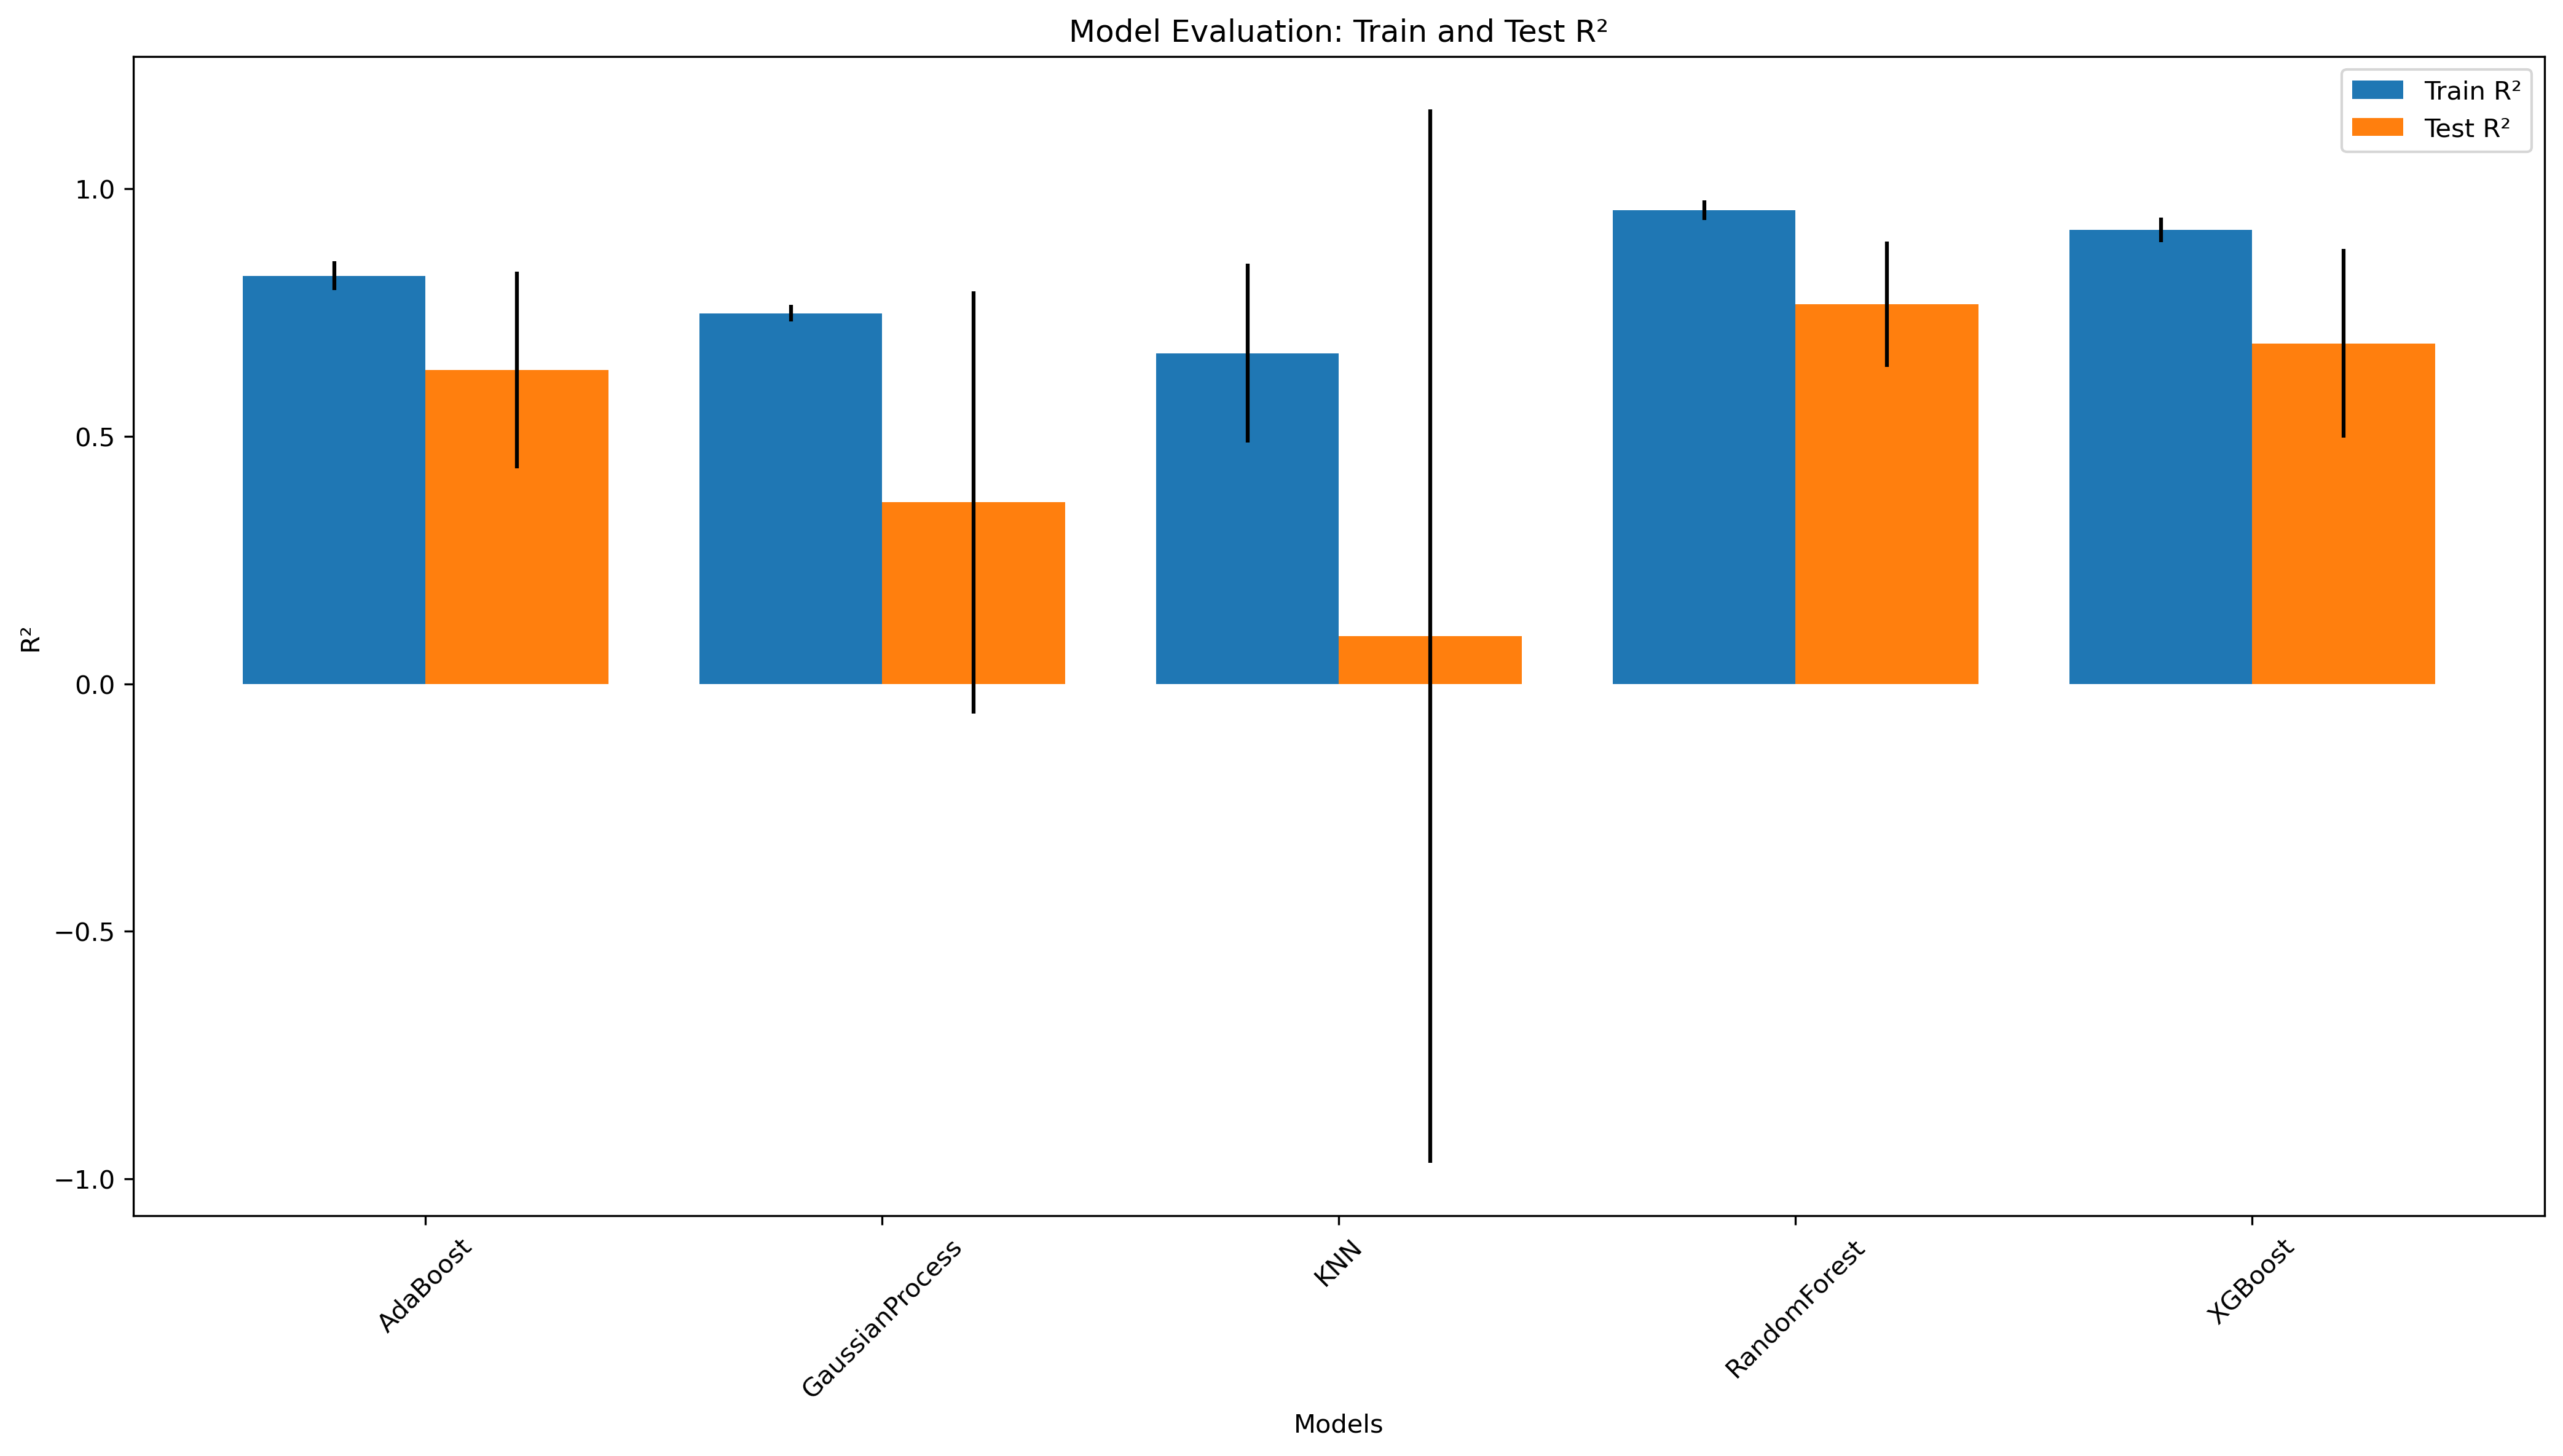

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('EL.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.9elmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()